### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Import the Dataset

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking for Null Values

In [4]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Delete Cabin Number as it doesnt affect the dependent variable
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
# Impute Age Values with mean
df['Age']=df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
# Dropping the rows with NaN Embarked values
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Survived', ylabel='Fare'>

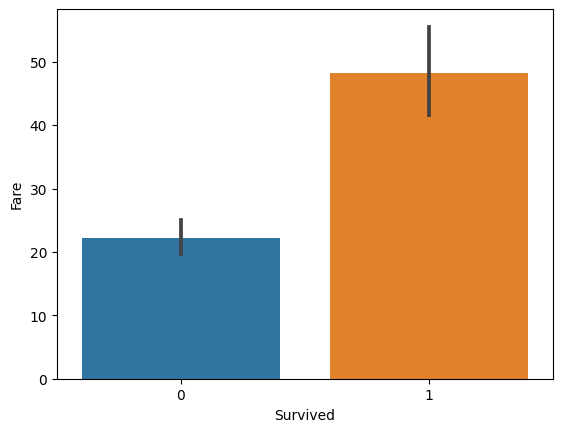

In [15]:
sns.barplot(x='Survived',y='Fare',data=df)

C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='Fare'>

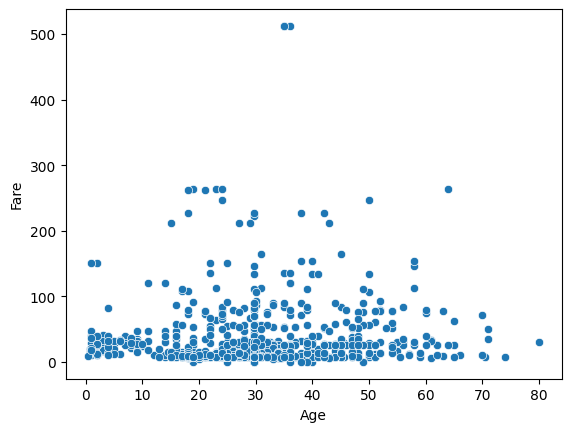

In [16]:
sns.scatterplot(x='Age',y='Fare',data=df)

C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='Fare'>

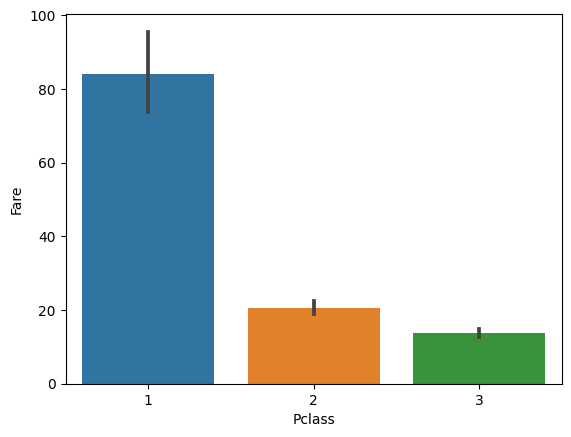

In [18]:
sns.barplot(x='Pclass',y='Fare',data=df)

C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Embarked', ylabel='Fare'>

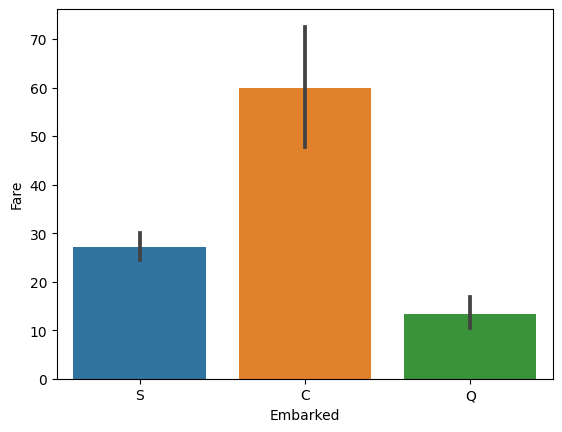

In [19]:
sns.barplot(x='Embarked',y='Fare',data=df)

C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\PRITAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Embarked', ylabel='Age'>

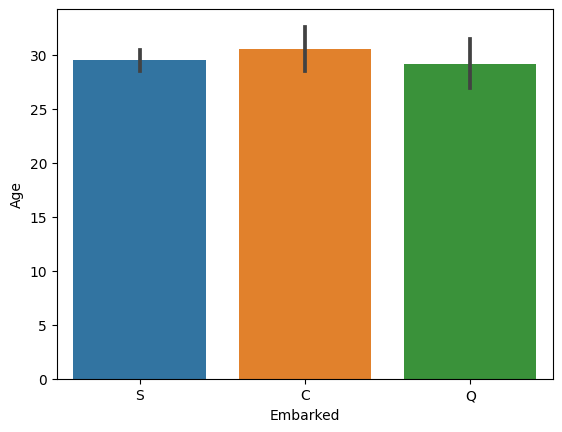

In [23]:
sns.barplot(x='Embarked',y='Age',data=df)

### Outlier Detection
     We need to check the Age and Fare columns

<Axes: >

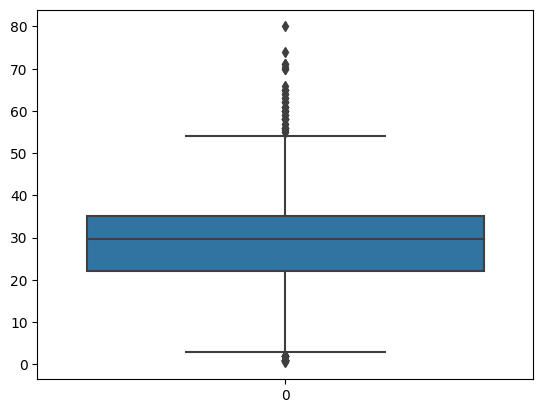

In [24]:
sns.boxplot(df['Age'])

In [27]:
# Using Quantile method
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
med=df['Age'].median()
iqr=q3-q1
q1,q3,iqr,med

(22.0, 35.0, 13.0, 29.69911764705882)

In [28]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr
upper,lower

(54.5, 2.5)

In [29]:
df['Age']=np.where(df['Age']>upper,med,df['Age'])
df['Age']=np.where(df['Age']<lower,med,df['Age'])

<Axes: >

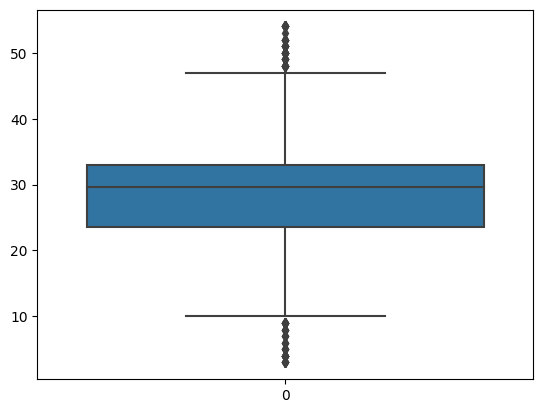

In [30]:
sns.boxplot(df['Age'])

<Axes: >

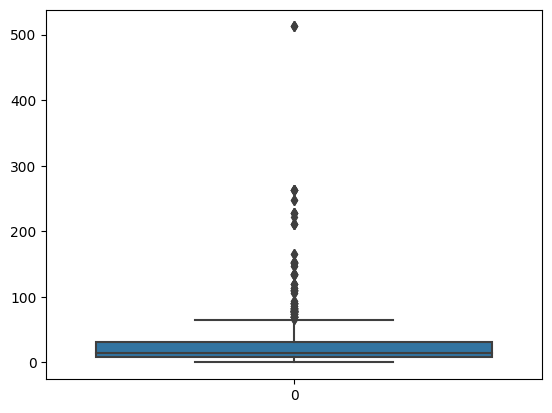

In [31]:
sns.boxplot(df['Fare'])

In [32]:
# Since Fare Prices are heavily related, so we woulld only remove the outliers using Z-Score

from scipy import stats

fares=stats.zscore(df.Fare)
fares

0     -0.500240
1      0.788947
2     -0.486650
3      0.422861
4     -0.484133
         ...   
886   -0.384475
887   -0.042213
888   -0.174084
889   -0.042213
890   -0.490173
Name: Fare, Length: 889, dtype: float64

In [36]:
df=df[np.abs(fares)<3]
df.shape

(869, 11)

<Axes: >

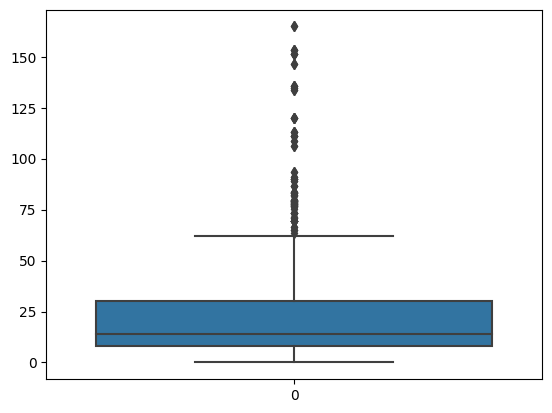

In [37]:
sns.boxplot(df.Fare)

### These outliers should not be removes as in accordance to Pclass, the fares vary drastically

### Splitting Dependent as Independent Data

In [66]:
X=df.drop(['PassengerId','Name','Ticket','Fare'],axis=1)
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [67]:
y=df['Fare']
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 869, dtype: float64

### Performing Encoding in Sex and Embarked Columns

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le1=LabelEncoder()
le2=LabelEncoder()

In [70]:
X['Sex']=le1.fit_transform(X['Sex'])
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,S
1,1,1,0,38.000000,1,0,C
2,1,3,0,26.000000,0,0,S
3,1,1,0,35.000000,1,0,S
4,0,3,1,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,S
887,1,1,0,19.000000,0,0,S
888,0,3,0,29.699118,1,2,S
889,1,1,1,26.000000,0,0,C


In [71]:
X['Embarked']=le2.fit_transform(X['Embarked'])
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,2
1,1,1,0,38.000000,1,0,0
2,1,3,0,26.000000,0,0,2
3,1,1,0,35.000000,1,0,2
4,0,3,1,35.000000,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2
887,1,1,0,19.000000,0,0,2
888,0,3,0,29.699118,1,2,2
889,1,1,1,26.000000,0,0,0


In [72]:
le1.inverse_transform(X['Sex'])

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'female',
       'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'female', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female',
       'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'f

In [75]:
X.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.326075,-0.532191,-0.032555,-0.039239,0.081954,-0.158939
Pclass,-0.326075,1.000000,0.113813,-0.283039,0.092867,0.049567,0.138783
Sex,-0.532191,0.113813,1.000000,0.061996,-0.112701,-0.253077,0.104778
Age,-0.032555,-0.283039,0.061996,1.000000,-0.163591,-0.118158,-0.006326
SibSp,-0.039239,0.092867,-0.112701,-0.163591,1.000000,0.409084,0.065572
Parch,0.081954,0.049567,-0.253077,-0.118158,0.409084,1.000000,0.048103
Embarked,-0.158939,0.138783,0.104778,-0.006326,0.065572,0.048103,1.000000


### Feature Scaling

In [79]:
## Using Standard Scaling
from sklearn.preprocessing import StandardScaler

In [80]:
sc1=StandardScaler()
sc2=StandardScaler()

In [81]:
X_sd=sc1.fit_transform(X)
X_sd

array([[-0.77483438,  0.80328206,  0.72611347, ...,  0.4365693 ,
        -0.46315329,  0.57489554],
       [ 1.29059838, -1.63745958, -1.37719522, ...,  0.4365693 ,
        -0.46315329, -1.99366089],
       [ 1.29059838,  0.80328206, -1.37719522, ..., -0.4710353 ,
        -0.46315329,  0.57489554],
       ...,
       [-0.77483438,  0.80328206, -1.37719522, ...,  0.4365693 ,
         2.06023359,  0.57489554],
       [ 1.29059838, -1.63745958,  0.72611347, ..., -0.4710353 ,
        -0.46315329, -1.99366089],
       [-0.77483438,  0.80328206,  0.72611347, ..., -0.4710353 ,
        -0.46315329, -0.70938267]])

### Splitting Data into Training and Testing Sets

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((695, 7), (174, 7), (695,), (174,))